In [2]:
__author__ =  'Julia Schmid'

# MALE01 Machine Learning
## 

In [3]:
# Auskommentieren für die Installation der benötigen Pakete?
#pip install pandas numpy seaborn matplotlib scikit-learn imbalanced-learn xgboost

## Einstellungen und Importe

In [4]:
# Importe 
import os
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression #xxxxxx
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, balanced_accuracy_score
from sklearn.metrics import roc_curve, auc

# Alle Spalten eines Datensatzes anzeigen
pd.set_option('display.max_columns', None) 

## Daten verstehen 

### Daten einlesen

Quelle: Fusion and Will Cukierski. Give Me Some Credit. https://kaggle.com/competitions/GiveMeSomeCredit, 2011. Kaggle.

In [5]:
df = pd.read_csv("cs-training.csv", sep=',')

### Daten beschreiben 

In [6]:
# Ausgabe der ersten 5 Zeilen
df.head() 

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [7]:
# Ausgabe der Anzahl der Zeilen und Spalten
print(f'Anzahl Zeilen: {df.shape[0]}')
print(f'Anzahl Spalten: {df.shape[1]}')

Anzahl Zeilen: 150000
Anzahl Spalten: 12


In [8]:
# Ausgabe der Datensatz-Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [9]:
# Ausgabe der Statistischenkennzahlen der numerischen Variablen
df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


### Daten visualisieren

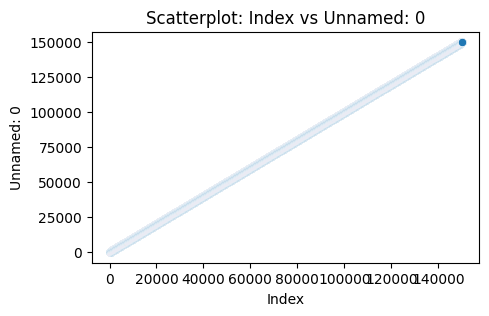

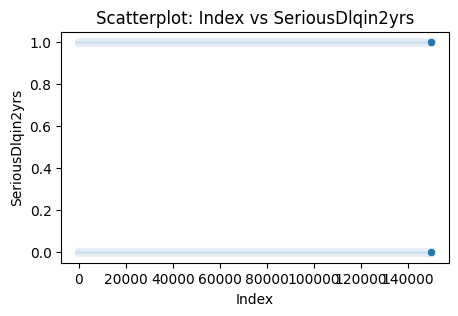

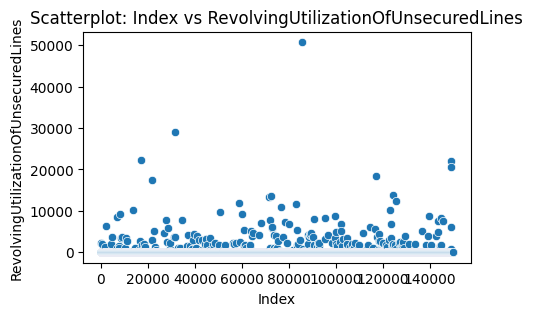

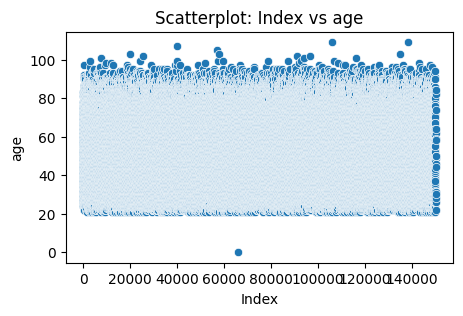

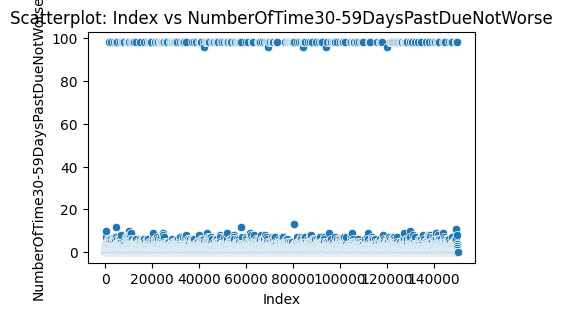

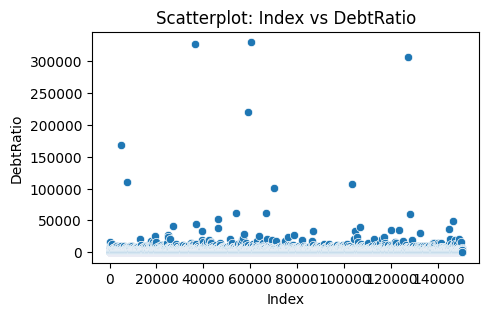

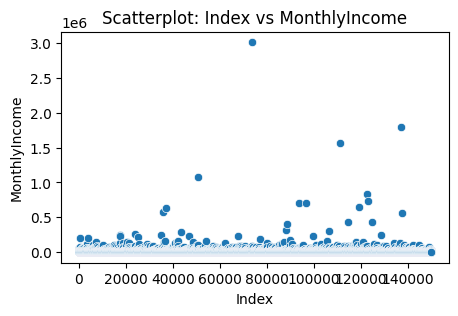

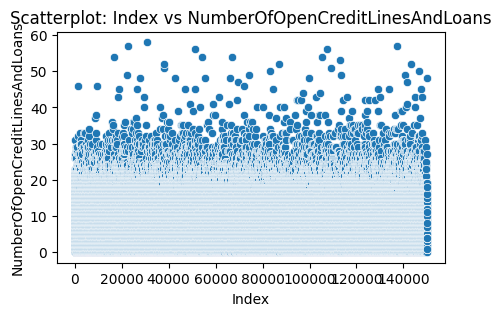

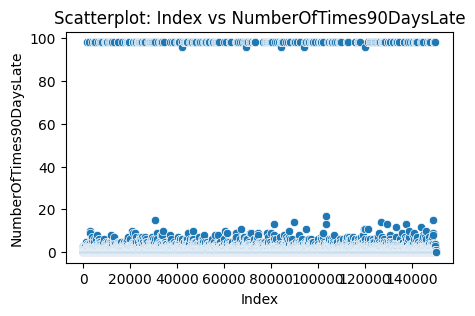

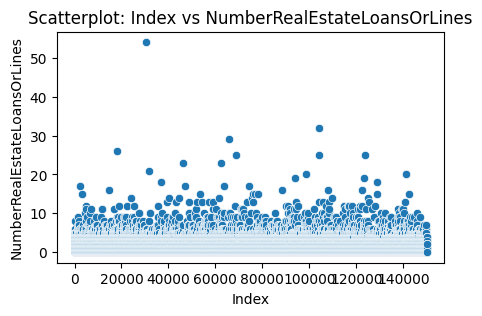

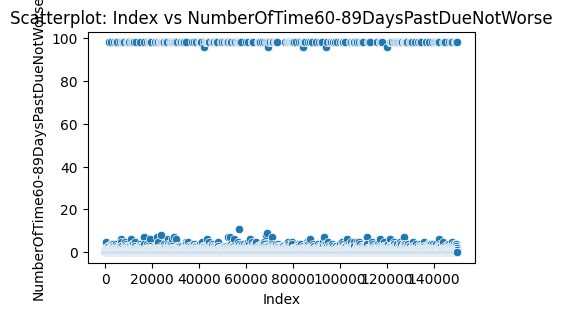

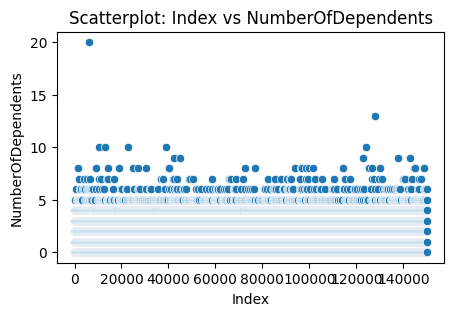

In [10]:
# Numerische Variablen plotten 
for i in df.columns:
    plt.figure(figsize=(5, 3))
    sns.scatterplot(x=df.index, y=df[i])  # Index auf der x-Achse
    plt.xlabel('Index')
    plt.ylabel(i)
    plt.title(f'{i}')
    plt.show()

## Daten aufbereiten
**NaN-Werte**

In [11]:
# Ausgabe des Namens der Variablen mit NaN-Werte und die Anzahl der Einträge mit NaN-Werten
count_nan = df.isna().sum()
count_nan[count_nan > 0]

MonthlyIncome         29731
NumberOfDependents     3924
dtype: int64

In [12]:
# Überarbeiten!!!!!!!!

df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)
df['MonthlyIncome'] = df['MonthlyIncome'].astype(int)

df['NumberOfDependents'].fillna(df['NumberOfDependents'].median(), inplace=True)
df['NumberOfDependents'] = df['NumberOfDependents'].astype(int)

/var/folders/jf/k1y_jzxs5177jm_fgv__dnww0000gn/T/ipykernel_28778/926256545.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)
/var/folders/jf/k1y_jzxs5177jm_fgv__dnww0000gn/T/ipykernel_28778/926256545.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are

**Duplikate**

In [13]:
df.duplicated().sum()

0

**Nicht Relevante Spalten löschen**

In [14]:
notRelevantVar =['Unnamed: 0']
df.drop(notRelevantVar, axis = 1, inplace = True)

# Modellierung

In [15]:
# Verzug Ja (1) Nein (0)
df['SeriousDlqin2yrs'].value_counts(normalize=True) * 100

SeriousDlqin2yrs
0    93.316
1     6.684
Name: proportion, dtype: float64

In [16]:
# Ergebnistabelle erstellen
df_result = pd.DataFrame(columns=['model','balanced_acc', 'precision', 'recall', 'f1', 'roc_auc'])

# Globale Variable für KNN
k = 2

# Funktion: Durchlauf des ML-Models 
def runModel(ml_model, X_train, y_train, X_test, y_test, name, df_result):
    print('[INFO] Model ' + name + ' started.')
    ml_model.fit(X_train, y_train)
    y_pred_model = ml_model.predict(X_test)
    print('[INFO] Model ' + name + ' finished.')
    return(y_pred_model)

# Funktion: Bestimmung der Evaluationsmetriken
def getResults(y_pred_model, y_test, name, df_result):
    balanced_acc = balanced_accuracy_score(y_test, y_pred_model)
    precision = precision_score(y_test, y_pred_model)
    recall = recall_score(y_test, y_pred_model)
    f1 = f1_score(y_test, y_pred_model)
    roc_auc = roc_auc_score(y_test, y_pred_model)

    fpr, tpr, _ = roc_curve(y_test, y_pred_model)
    roc_auc = auc(fpr, tpr)


    temp = pd.DataFrame([[name, balanced_acc, precision, recall, f1,roc_auc ]], columns=['model','balanced_acc', 'precision', 'recall', 'f1', 'roc_auc'])
    df_result = pd.concat([df_result, temp], ignore_index=True)

    return df_result, (fpr, tpr, roc_auc)

# Funktion: Aufruf der definierten Modelle
def run_models(models, run_function, df_result, X_train,y_train, X_test, y_test):
    roc_data = {}
    for model_name, model in models.items():
        y_pred = run_function(model, X_train, y_train, X_test, y_test, model_name, df_result)
        df_result, roc_data[model_name] = getResults(y_pred, y_test, model_name, df_result)
    return df_result, roc_data

# Funktion: Darstellung der ROC-Kurve
setColors = ['blue', 'green', 'red', 'orange']
def plot_roc_curves(roc_data, title):
    plt.figure(figsize=(8, 6))
    
    for idx, (model_name, data) in enumerate(roc_data.items()):
        color = setColors[idx % len(setColors)]
        fpr, tpr, auc = data
        plt.plot(fpr, tpr, color=color, lw=1, label=f'{model_name} (AUC = {auc:.2f})')
    
    plt.plot([0, 1], [0, 1], color='gray', lw=0.5, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

## Normal 

In [17]:
y = df['SeriousDlqin2yrs']
X = df.loc[:,df.columns != 'SeriousDlqin2yrs']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

[INFO] Model RF started.
[INFO] Model RF finished.
[INFO] Model KNN started.


/var/folders/jf/k1y_jzxs5177jm_fgv__dnww0000gn/T/ipykernel_28778/1370504522.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_result = pd.concat([df_result, temp], ignore_index=True)


[INFO] Model KNN finished.
[INFO] Model XGB started.
[INFO] Model XGB finished.
[INFO] Model LogReg started.
[INFO] Model LogReg finished.


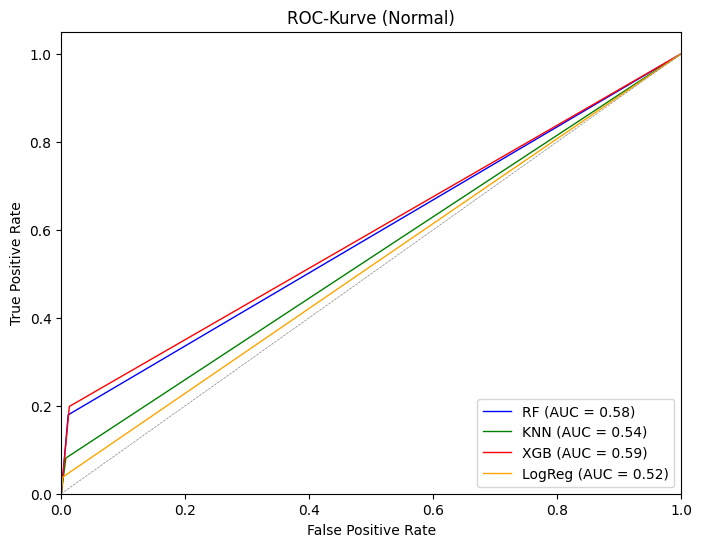

In [19]:
models_normal = {
    'RF': RandomForestClassifier(random_state=123),
    'KNN': KNeighborsClassifier(n_neighbors=k),
    'XGB': xgb.XGBClassifier(objective="binary:logistic", eval_metric='auc', random_state=123, n_estimators=500, learning_rate=0.2),
    'LogReg': LogisticRegression()
}

df_result, roc_data_normal = run_models(models_normal, runModel, df_result, X_train_scaled,y_train, X_test_scaled, y_test)
plot_roc_curves(roc_data_normal, 'ROC-Kurve (Normal)')

## Anpassung der Algorithmen

In [ ]:
ratio = sum(y_train == 0) / sum(y_train == 1)

models_algo = {
    'RF Algo': RandomForestClassifier(random_state=123, class_weight="balanced"),
    'KNN Algo': KNeighborsClassifier(n_neighbors=k, weights='distance'),
    'XGB Algo': xgb.XGBClassifier(objective="binary:logistic", eval_metric = 'auc', random_state=123, n_estimators=500, learning_rate=0.2, scale_pos_weight=ratio),
    'LogReg Algo': LogisticRegression(class_weight="balanced"),
}

df_result, roc_data_algo = run_models(models_algo, runModel, df_result, X_train_scaled,y_train, X_test_scaled, y_test)
plot_roc_curves(roc_data_algo, 'ROC-Kurve (Anpassung ML-Algorithmus)')

[INFO] Model RF Algo started.
[INFO] Model RF Algo finished.
[INFO] Model KNN Algo started.


## Undersampling

In [525]:
print('Original dataset shape %s' % Counter(y))

rus = RandomUnderSampler(random_state=123)
X_us, y_us = rus.fit_resample(X, y)

print('Resampled dataset shape %s' % Counter(y_us))

X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X_us, y_us, test_size = 0.2, random_state = 123)

Original dataset shape Counter({0: 139974, 1: 10026})
Resampled dataset shape Counter({0: 10026, 1: 10026})


In [526]:
scaler = StandardScaler()
X_train_us_scaled = scaler.fit_transform(X_train_us)
X_test_us_scaled = scaler.transform(X_test_us)

[INFO] Model RF US started.
[INFO] Model RF US finished.
[INFO] Model KNN US started.
[INFO] Model KNN US finished.
[INFO] Model XGB US started.
[INFO] Model XGB US finished.
[INFO] Model LogReg US started.
[INFO] Model LogReg US finished.


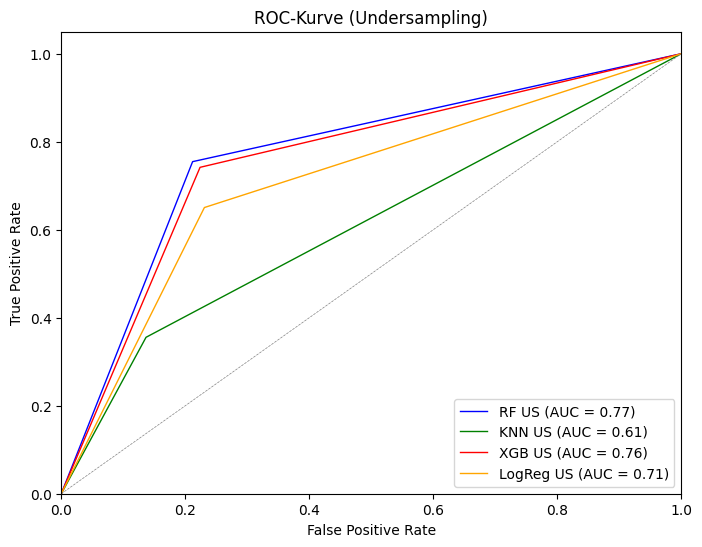

In [527]:
models_us = {
    'RF US': RandomForestClassifier(random_state=123),
    'KNN US': KNeighborsClassifier(n_neighbors=k),
    'XGB US': xgb.XGBClassifier(objective="binary:logistic", eval_metric = 'auc', random_state=123, n_estimators=500, learning_rate=0.2),
    'LogReg US': LogisticRegression(),
}

df_result, roc_data_us= run_models(models_us, runModel, df_result, X_train_us_scaled,y_train_us, X_test_us_scaled, y_test_us)
plot_roc_curves(roc_data_us, 'ROC-Kurve (Undersampling)')

## Oversampling

In [528]:
print('Original dataset shape %s' % Counter(y))

ros = RandomOverSampler(sampling_strategy='minority')
X_os, y_os = ros.fit_resample(X, y)

print('Resampled dataset shape %s' % Counter(y_os))

X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_os, y_os, test_size = 0.2, random_state = 123)



Original dataset shape Counter({0: 139974, 1: 10026})
Resampled dataset shape Counter({1: 139974, 0: 139974})


In [529]:
scaler = StandardScaler()
X_train_os_scaled = scaler.fit_transform(X_train_os)
X_test_os_scaled = scaler.transform(X_test_os)

[INFO] Model RF OS started.
[INFO] Model RF OS finished.
[INFO] Model KNN OS started.
[INFO] Model KNN OS finished.
[INFO] Model XGB OS started.
[INFO] Model XGB OS finished.
[INFO] Model LogReg OS started.
[INFO] Model LogReg OS finished.


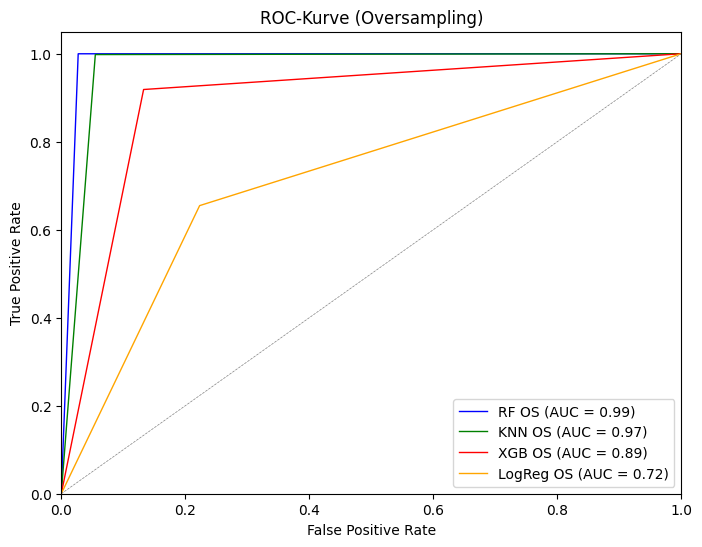

In [530]:
models_os = {
    'RF OS': RandomForestClassifier(random_state=123),
    'KNN OS': KNeighborsClassifier(n_neighbors=k),
    'XGB OS': xgb.XGBClassifier(objective="binary:logistic", eval_metric = 'auc', random_state=123, n_estimators=500, learning_rate=0.2),
    'LogReg OS': LogisticRegression(),
}

df_result, roc_data_os= run_models(models_os, runModel, df_result, X_train_os_scaled,y_train_os, X_test_os_scaled, y_test_os)
plot_roc_curves(roc_data_os, 'ROC-Kurve (Oversampling)')

## SMOTE

In [531]:
print('Original dataset shape %s' % Counter(y_train))

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print('Neue Klassenverteilung nach SMOTE:', Counter(y_train_smote))



Original dataset shape Counter({0: 111960, 1: 8040})
Neue Klassenverteilung nach SMOTE: Counter({0: 111960, 1: 111960})


In [532]:
scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_smote_scaled = scaler.transform(X_test)

[INFO] Model RF SMOTE started.
[INFO] Model RF SMOTE finished.
[INFO] Model KNN SMOTE started.
[INFO] Model KNN SMOTE finished.
[INFO] Model XGB SMOTE started.
[INFO] Model XGB SMOTE finished.
[INFO] Model LogReg SMOTE started.
[INFO] Model LogReg SMOTE finished.


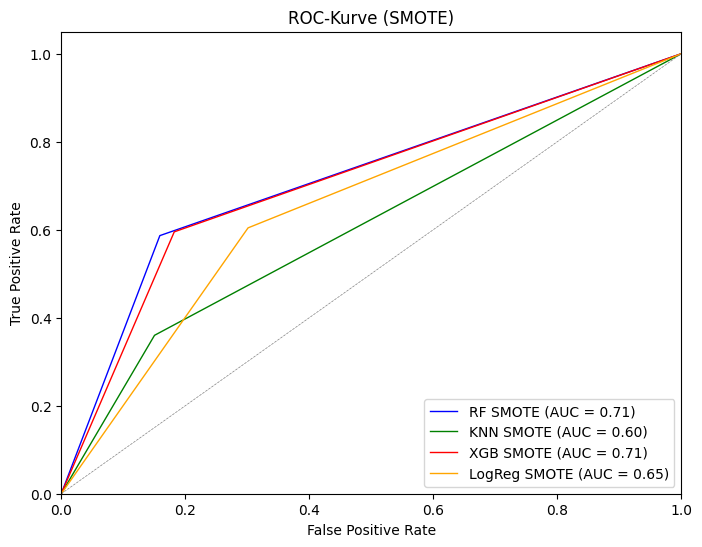

In [533]:
models_smote = {
    'RF SMOTE': RandomForestClassifier(random_state=123),
    'KNN SMOTE': KNeighborsClassifier(n_neighbors=k),
    'XGB SMOTE': xgb.XGBClassifier(objective="binary:logistic", eval_metric = 'auc', random_state=123, n_estimators=500, learning_rate=0.2),
    'LogReg SMOTE': LogisticRegression(),
}

df_result, roc_data_smote= run_models(models_smote, runModel, df_result, X_train_smote_scaled,y_train_smote, X_test_smote_scaled, y_test)
plot_roc_curves(roc_data_smote, 'ROC-Kurve (SMOTE)')

## Vergleich der Ergebnisse

In [534]:
df_result

,model,balanced_acc,precision,recall,f1,roc_auc
0,RF,0.584077,0.533733,0.179255,0.268375,0.584077
1,KNN,0.536839,0.437500,0.081067,0.136788,0.536839
2,XGB,0.592698,0.519789,0.198389,0.287172,0.592698
3,LogReg,0.517722,0.535714,0.037764,0.070555,0.517722
4,RF Algo,0.573049,0.525424,0.156093,0.240683,0.573049
5,KNN Algo,0.582283,0.232065,0.215005,0.223210,0.582283
6,XGB Algo,0.736867,0.256610,0.596173,0.358788,0.736867
7,LogReg Algo,0.720842,0.172967,0.668177,0.274798,0.720842
8,RF US,0.771450,0.782295,0.754717,0.768259,0.771450
9,KNN US,0.609403,0.723964,0.355511,0.476856,0.609403


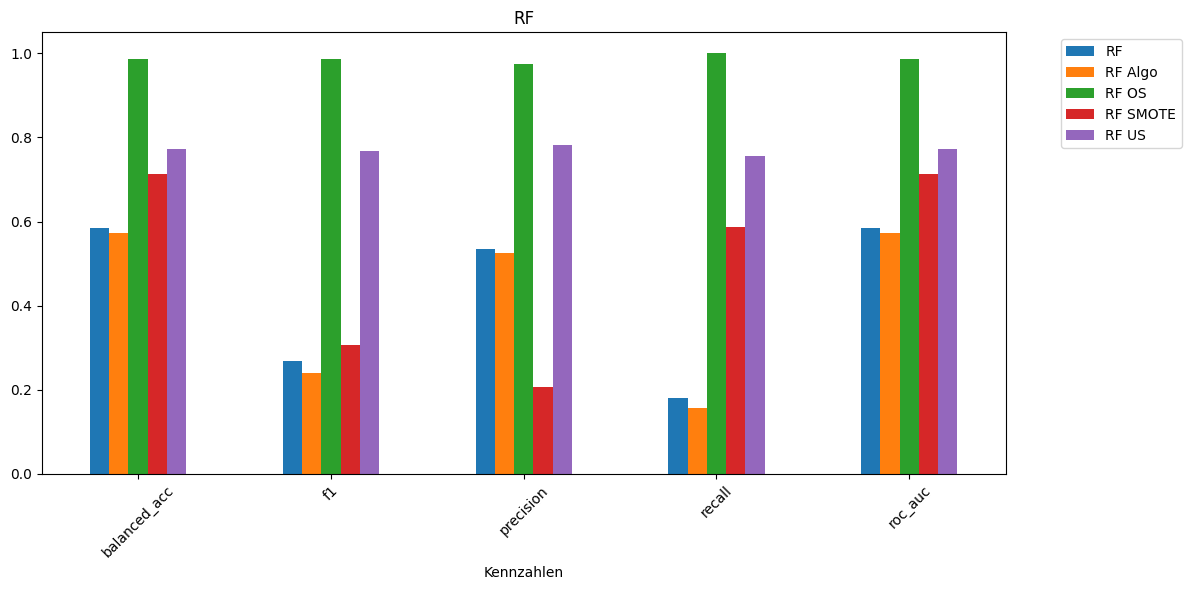

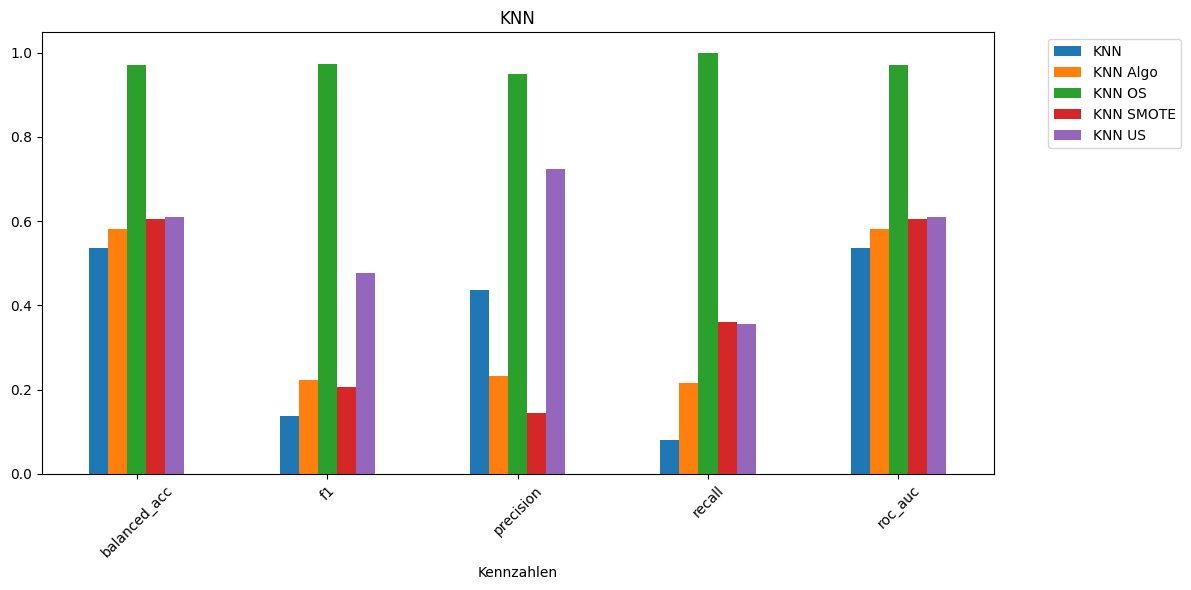

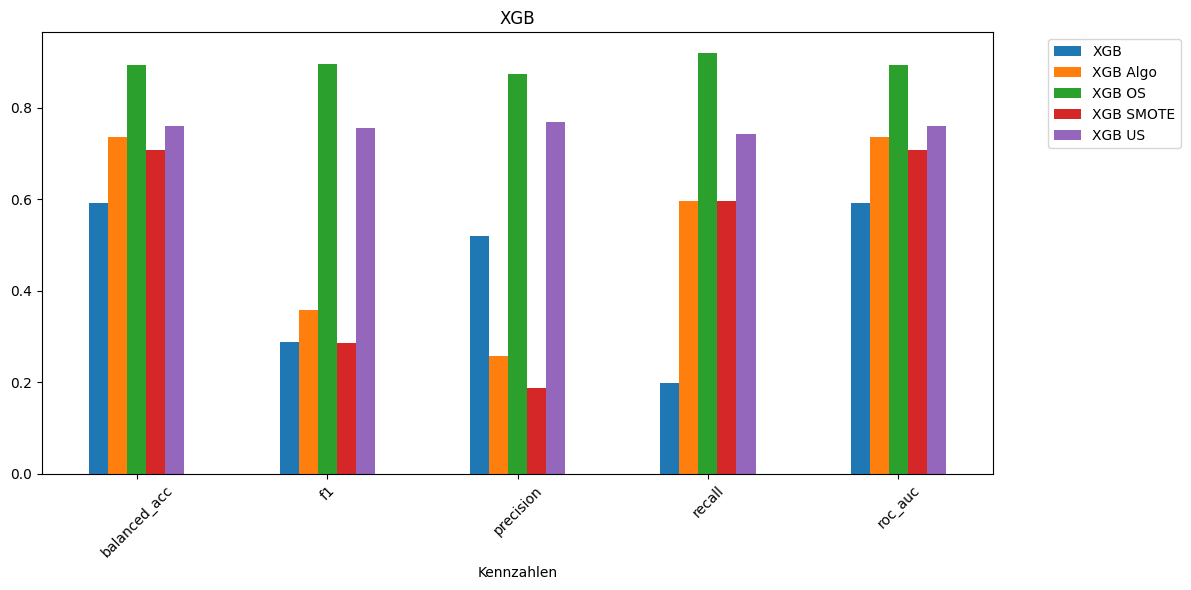

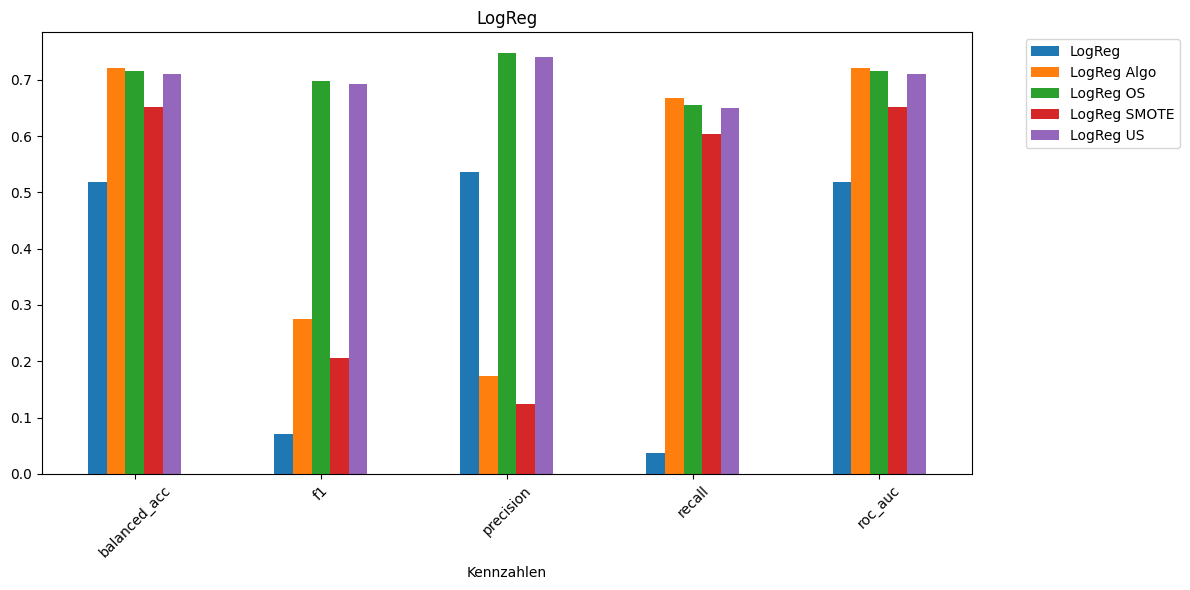

In [535]:
models = ['RF', 'KNN', 'XGB', 'LogReg']

for i in models:
    df_temp = df_result[df_result["model"].str.contains(i)]
    df_temp = df_temp.melt(id_vars="model", var_name="metric", value_name="value")
    df_temp = df_temp.pivot(index="metric", columns="model", values="value")

    df_temp.plot(kind="bar", figsize=(12, 6))
    plt.title(i)
    plt.xlabel("Kennzahlen")
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

***
***